In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

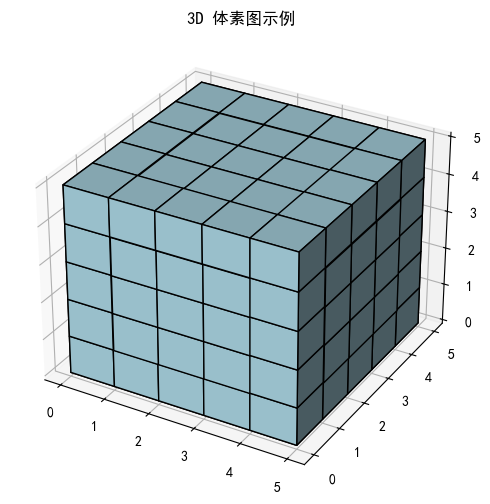

In [3]:
# 创建一个 3D 布尔数组
# 使用np.ones创建一个5x5x5的全为True的数组，表示所有体素都会被填充
filled = np.ones((5, 5, 5), dtype=bool)

# 创建图形和3D坐标轴
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制体素
ax.voxels(filled,                  # 指定需要填充的体素
          facecolors='lightblue',  # 体素面颜色
          edgecolors='k'           # 体素边缘颜色
         )

# 设置标题
ax.set_title("3D 体素图示例")

plt.show()

# 2、使用示例：

### 示例 1：定义填充规则（filled参数）

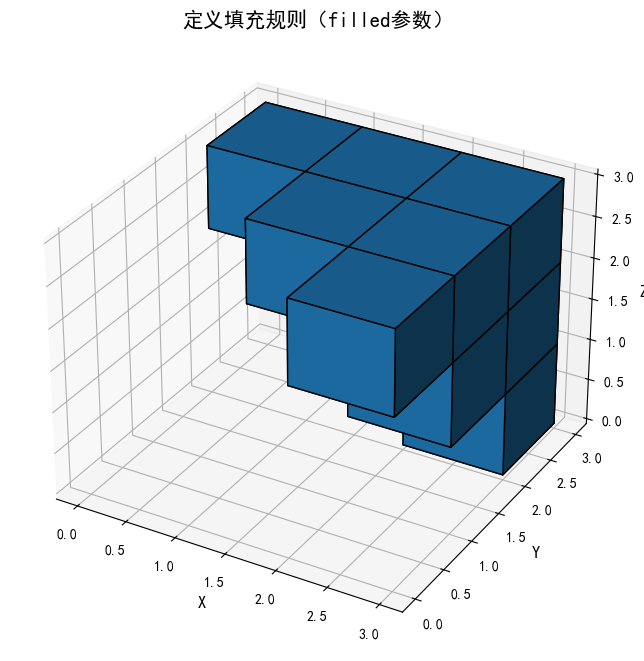

In [4]:
# 创建一个 3x3x3 的立方体数据
x, y, z = np.indices((4, 4, 4))

# 定义哪些体素需要被填充
filled = (x < 3) & (y < 3) & (z < 3) & (x + y + z > 3)

# 创建图形和 3D 轴
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制体素
voxels = ax.voxels(filled, edgecolor='k')

# 设置标题和坐标轴标签
ax.set_title('定义填充规则（filled参数）', fontsize=15)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z ', fontsize=12)

plt.show()

### 示例 2：自定义体素颜色

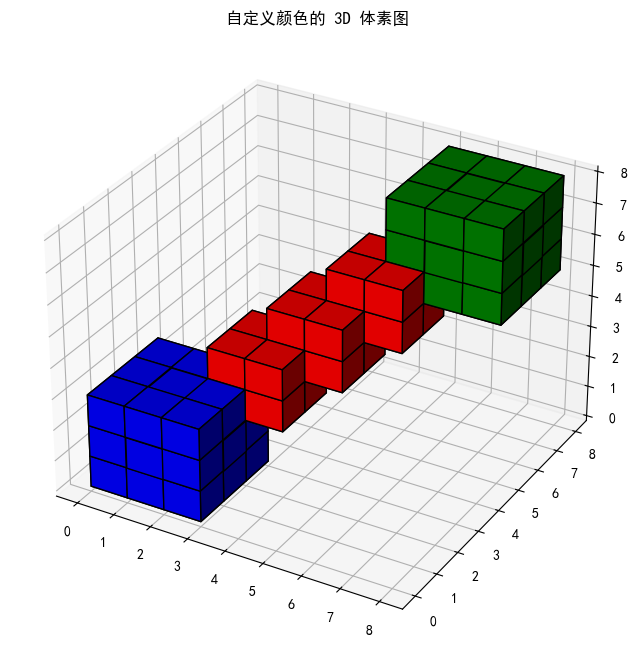

In [5]:
# 准备8×8×8的坐标网格
x, y, z = np.indices((8, 8, 8))

# 创建左上角和右下角的立方体
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)

# 创建两个立方体之间的连接通道
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# 合并所有对象
voxelarray = cube1 | cube2 | link

# 为不同对象设置颜色
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# 绘制图形
ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

ax.set_title("自定义颜色的 3D 体素图")

plt.show()

### 示例 3：创建带间隙的3D体素

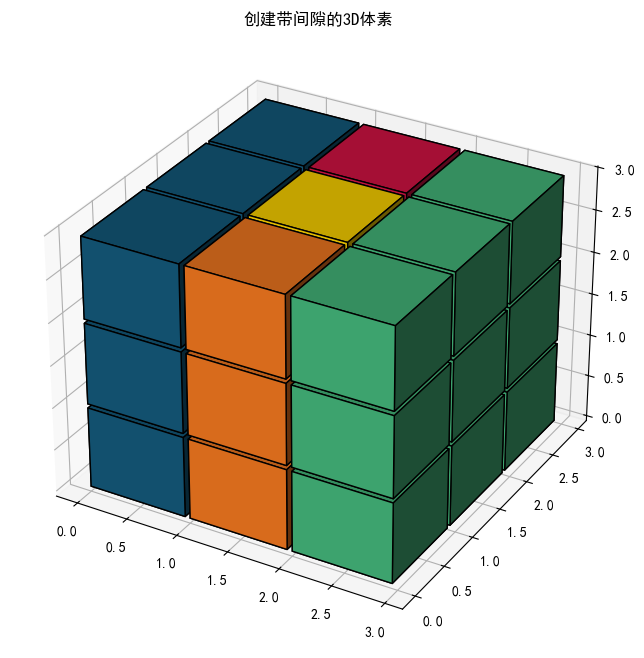

In [6]:
# 创建一个3×3×3的全True布尔数组，表示初始状态下所有体素都被填充
n_voxels = np.ones((3, 3, 3), dtype=bool)

# 通过上采样创建间隙
# 将原始3×3×3数组放大到6×6×6（每个维度×2）
size = np.array(n_voxels.shape) * 2
# 创建一个比放大后尺寸小1的零数组（5×5×5）
filled_2 = np.zeros(size - 1, dtype=n_voxels.dtype)
# 在放大后的数组中每隔一个位置填充原始体素，创建间隙效果
filled_2[::2, ::2, ::2] = n_voxels

# 创建控制网格调整间隙大小
# 生成比filled_2大1的索引网格（6×6×6），并转换为浮点数后除以2
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2

# 调整间隙大小
# 在x/y/z方向的奇数索引位置增加0.95，扩大该方向的间隙
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

# 设置颜色
# 定义魔方六个面的颜色（黄、白、橙、红、蓝、绿）
colors = np.array(['#ffd400', "#fffffb", "#f47920", "#d71345", "#145b7d", "#45b97c"])
# 初始化所有体素面为灰色（#77787b）
facecolors = np.full(filled_2.shape, '#77787b')

# 为六个面分配不同颜色
facecolors[:, :, -1] = colors[0]
facecolors[:, :, 0] = colors[1] 
facecolors[:, 0, :] = colors[2] 
facecolors[:, -1, :] = colors[3] 
facecolors[0, :, :] = colors[4] 
facecolors[-1, :, :] = colors[5] 

ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
# 绘制体素图：
# x,y,z - 调整后的坐标网格
# filled_2 - 决定哪些位置绘制体素
# facecolors - 各面的颜色
# edgecolor='k' - 边缘设为黑色
ax.voxels(x, y, z, filled_2, facecolors=facecolors, edgecolor='k')

ax.set_title("创建带间隙的3D体素")
plt.show()

### 示例 4：使用自定义坐标网格

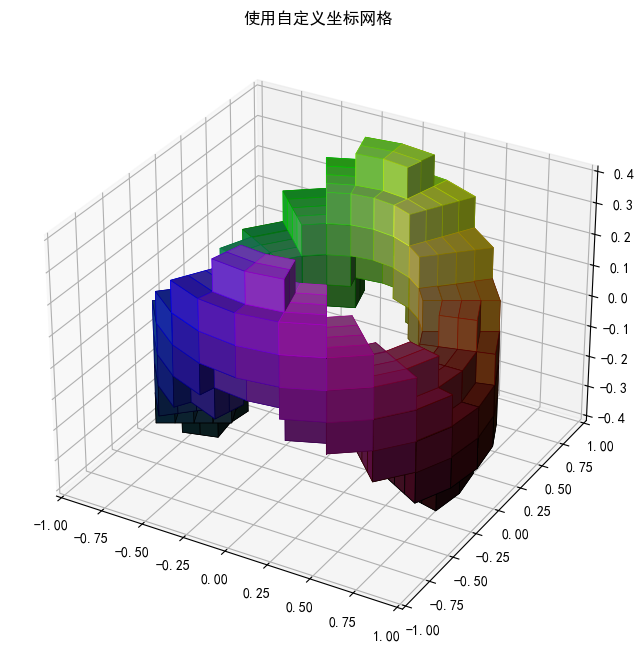

In [7]:
def midpoints(x):
    """计算数组相邻元素的中点
    参数:
        x: 输入的多维数组
    返回:
        各维度相邻元素中点组成的数组
    """
    sl = ()  # 初始化切片对象
    for i in range(x.ndim):  # 遍历数组的每个维度
        # 计算当前维度相邻元素的平均值
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]  # 更新切片对象以包含所有已处理的维度
    return x

# 在圆柱坐标系中创建网格
# r: 半径方向，从0到1分为11个点
# theta: 角度方向，从0到2π分为25个点
# z: 高度方向，从-0.5到0.5分为11个点
r, theta, z = np.mgrid[0:1:11j, 0:np.pi*2:25j, -0.5:0.5:11j]

# 将圆柱坐标转换为笛卡尔坐标
x = r * np.cos(theta)  # x坐标 = r*cosθ
y = r * np.sin(theta)  # y坐标 = r*sinθ

# 计算各维度的中点坐标
rc = midpoints(r)       # 半径方向中点
thetac = midpoints(theta)  # 角度方向中点
zc = midpoints(z)       # 高度方向中点

# 定义一个环状结构（环形曲面）
# 数学表达式定义了一个扭曲的环形曲面
sphere = (rc - 0.7)**2 + (zc + 0.2*np.cos(thetac*2))**2 < 0.2**2

# 创建HSV颜色数组，并转换为RGB
hsv = np.zeros(sphere.shape + (3,))  # 初始化HSV颜色数组
hsv[..., 0] = thetac / (np.pi * 2)   # 色调(H)：随角度变化
hsv[..., 1] = rc                      # 饱和度(S)：随半径变化
hsv[..., 2] = zc + 0.5                # 明度(V)：随高度变化
colors = matplotlib.colors.hsv_to_rgb(hsv)  # 将HSV转换为RGB颜色

# 绘制体素
ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
ax.voxels(x, y, z, sphere,
          facecolors=colors,  # 设置面颜色
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # 增强边缘亮度
          linewidth=0.5)      # 设置边缘线宽

ax.set_title("使用自定义坐标网格")
plt.show()